# ABCD Method: Why It Works

The ABCD method of background estimation relies on an important assumption about the correlation between the two variables our background data depends on. If our background data is of the form $f(x,y)$, we must assume that it can be decomoposed into the product of two independent, continuous functions, $f_1(x)$ and $f_2(y)$:

$f(x,y) = f_1(x)f_2(y)$

If we separate our regions at $x = x_0$ and $y = y_0$, then to find how many data "counts" are in a region we integrate $f(x,y)$ over that region.

Our counts in each region will then be:

$D = \int_{0}^{y_0} \int_{0}^{x_0} f(x,y)dxdy = \int_{0}^{y_0} f_2(y)dy \int_{0}^{x_0} f_1(x) dx$,

$C = \int_{0}^{y_0} f_2(y)dy \int_{x_0}^{1} f_1(x) dx$,

$B = \int_{y_0}^{1} f_2(y)dy \int_{0}^{x_0} f_1(x) dx$,

$A = \int_{y_0}^{1} f_2(y)dy \int_{x_0}^{1} f_1(x) dx$.

Because we make the assumption that $f(x,y)$ can be written as the product $f_1(x)f_2(y)$, we are able to separate the iterated integral into a product of two integrals of one variable each. As a result of this, when we take the ratio of the counts in region B and region D, we get

$\frac{B}{D} = \frac{\int_{y_0}^{1} f_2(y)dy \int_{0}^{x_0} f_1(x) dx}{\int_{0}^{y_0} f_2(y)dy \int_{0}^{x_0} f_1(x) dx} = \frac{\int_{y_0}^{1} f_2(y)dy}{\int_{0}^{y_0} f_2(y)dy}$,

and the same ratio of counts in region A and region C is

$\frac{A}{C} = \frac{\int_{y_0}^{1} f_2(y)dy \int_{x_0}^{1} f_1(x) dx$}{\int_{0}^{y_0} f_2(y)dy \int_{x_0}^{1} f_1(x) dx$} = \frac{\int_{y_0}^{1} f_2(y)dy}{\int_{0}^{y_0} f_2(y)dy} = \frac{B}{D}$.

Our assumption that $f(x,y)$ can be written as the product $f_1(x)f_2(y)$ makes the ratio of counts in B and D, which both span the same $x$-values, only depend on $y$. Regions A and C both span the same $x$-values, and each span the same $y$-values as B and D, respectively. Because of the way these regions cover the same $x$ and $y$-values as neighboring regions, the ratio of counts in region B and region D is equal to that of region A and region C.

In [140]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp
import matplotlib.path as path

In [141]:
# Function to create random, flat data
# Returns array of dimensions (size,2)

def rand(size = 1000):
    return np.random.random_sample((size,2))

In [142]:
# Function to count data in regions A, B, C, and D; 
# Returns difference of predicted A and real A.
# Parameters: (random data sample size, x region cutoff, y region cutoff)
# For events in which region D has zero counts, function passes NaN value (dealt with later)

def count(size, x_0 = 0.6, y_0 = 0.6):
    counts = np.zeros(4)
    Regions = [path.Path([(0,0),(x_0,0),(x_0,y_0),(0,y_0)]), path.Path([(x_0,0),(1,0),(1,y_0),(x_0,y_0)]), path.Path([(0,y_0),(x_0,y_0),(x_0,1),(0,1)]), path.Path([(x_0,y_0),(1,y_0),(1,1),(x_0,1)])]
    data = rand(size)

    for i in range(4):
        filtered = Regions[i].contains_points(data)
        counts[i] = np.sum(filtered)
    if counts[0] != 0:
        A_real = counts[3]
        A_pred = counts[1] * counts[2] / counts[0]
        dev = A_real - A_pred
        return dev

In [143]:
# Function to loop count function, prepare array of differences
# Parameters: (number of loops, random data sample size, x region cutoff, y region cutoff, number of bins)
# For NaN values returned from count, this function prints the number of failed attempts

def deviation(nloops = 1000, size = 1000, x_0 = 0.6, y_0 = 0.6, bins = 30):
    fails = 0
    deviations = np.zeros(nloops)
    for i in range(nloops):
        deviations[i] = count(size, x_0, y_0)
        fail = np.isnan(deviations)
        if fail[i]:
            fails = fails + 1
    return deviations

In [151]:
# Function to plot histogram of differences
# Parameters: (number of loops, random data sample size, x region cutoff, y region cutoff, number of bins)

def dev_hist(nloops = 1000, size = 1000, x_0 = 0.6, y_0 = 0.6, bins = 30):
    fails = 0
    deviations = np.zeros(nloops)
    for i in range(nloops):
        deviations[i] = count(size, x_0, y_0)
        fail = np.isnan(deviations)
        if fail[i]:
            fails = fails + 1
    print('ABCD method has failed', fails, 'out of', size, 'times.')
    plt.title('Differences in predicted and true counts of ABCD method')
    plt.xlabel('A_real - A_pred')
    plt.ylabel('number of times differences occured')
    plt.hist(deviations, bins)
    plt.show()
    return

In [145]:
# Function to plot normalized widths of deviation histograms in predicted ABCD outcome.
# Parameters: (number of loops of dev_hist, size of random data sample, 
# x regions cutoff, y regions cutoff, number of bins of deviation histogram)

def width(nloops, size, x_0, y_0, bins):
    sample = deviation(nloops, size, x_0 , y_0, bins)
    std = np.std(sample)/size
    return std

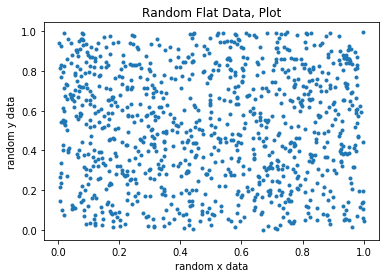

Correlation between x and y data values is -0.004109820105930202


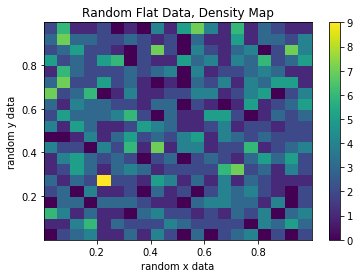

In [146]:
# Look at data distribution and correlation

example_data = rand(1000)

plt.plot(example_data[:,0], example_data[:,1], '.')
plt.title('Random Flat Data, Plot')
plt.xlabel('random x data')
plt.ylabel('random y data')
plt.show()

density_map = plt.hist2d(example_data[:,0], example_data[:,1], 20)
plt.title('Random Flat Data, Density Map')
plt.xlabel('random x data')
plt.ylabel('random y data')
plt.colorbar()


[a,b] = sp.pearsonr(example_data[:,0], example_data[:,1])
print('Correlation between x and y data values is' , a)

ABCD method has failed 0 out of 1000 times.


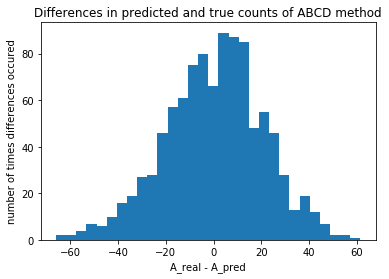

ABCD method has failed 19 out of 100 times.


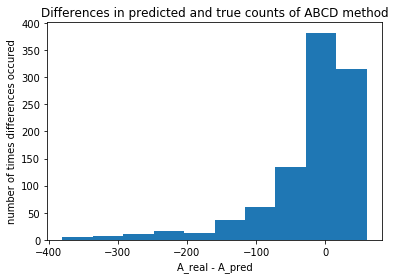

In [157]:
# Repeat 1000 times and plot a histogram of the differences

dev_hist()

# To see the method failing more frequently, make region D smaller and increase sample size

dev_hist(1000, 100, 0.2, 0.2, 10)

Text(0, 0.5, 'width of difference distribution')

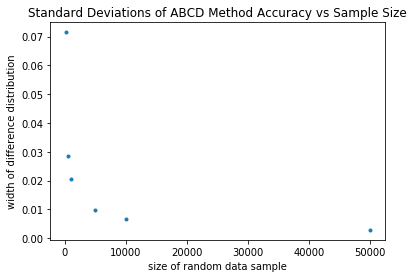

In [155]:
# Repeat this for various sample sizes, plot width vs sample size

width_data = np.zeros(7)
width_data[0] = width(1000, 10, 0.6, 0.6, 5)
width_data[1] = width(1000, 100, 0.6, 0.6, 10)
width_data[2] = width(1000, 500, 0.6, 0.6, 20)
width_data[3] = width(1000, 1000, 0.6, 0.6, 30)
width_data[4] = width(1000, 5000, 0.6, 0.6, 100)
width_data[5] = width(1000, 10000, 0.6, 0.6, 100)
width_data[6] = width(1000, 50000, 0.6, 0.6, 100)
sizes = [10, 100, 500, 1000, 5000, 10000, 50000]
plt.plot(sizes, width_data, '.')
plt.title('Standard Deviations of ABCD Method Accuracy vs Sample Size')
plt.xlabel('size of random data sample')
plt.ylabel('width of difference distribution')